In [89]:
# Import necessary libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#About the dataset


Data Set contains two folders named as Train and Test. Within each of these fol
ders there are 2 different folders WithMask and WithoutMask. WithMask folder 
contains grayscale images of faces with mask. WithoutMask folder contains gra
yscale images of faces with without mask. All images are of resolution 28x28

In [90]:
#Read Images Using

In [ ]:
image_size = (128, 128,3)

train_data_dir = r'C:\Users\HP\Downloads\NN-Graded Internal Assignment (1)\GrayScale28X28MaskDataSet\train'
test_data_dir = r'C:\Users\HP\Downloads\NN-Graded Internal Assignment (1)\GrayScale28X28MaskDataSet\test'


Define the image data generators

In [22]:

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rescale=1./255
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

# Create the train and test datasets
train_ds = train_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    seed=42
)

test_ds = test_gen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    seed=42
)

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


Ploting Sample Images

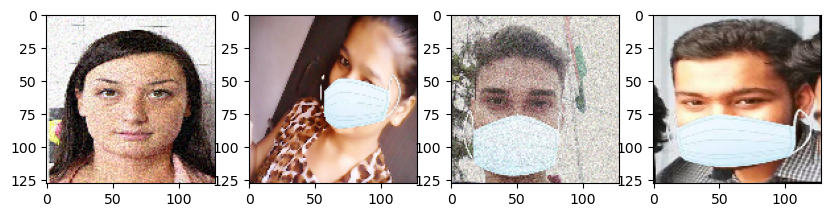

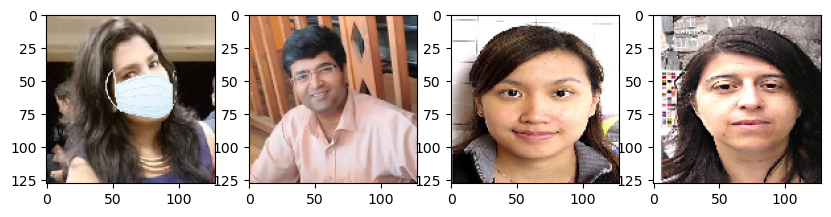

In [32]:


def plot_images(generator, num_images=4):
    images, labels = next(generator)
    
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])


plot_images(train_ds)

plot_images(test_ds)


In [ ]:
# Model Building

In [67]:

# VGG19 base model
base_model = tf.keras.applications.VGG19(include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

# Build the model
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dropout(0.5),  # Adding a dropout layer with a dropout rate of 0.5 (you can adjust the rate as needed)
    layers.Dense(2, activation='sigmoid')
])



In [68]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_binary_accuracy', mode='max', patience=4, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_binary_accuracy', factor=0.5, patience=2, verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train the model with validation data
history = model.fit(train_ds, 
                    batch_size=32, 
                    epochs=10, 
                    callbacks=[early_stopping, lr_scheduler],  
                    validation_data=test_ds)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - binary_accuracy: 0.7350 - loss: 0.5220 - val_binary_accuracy: 0.9613 - val_loss: 0.1386 - learning_rate: 0.0010
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - binary_accuracy: 0.9505 - loss: 0.1580 - val_binary_accuracy: 0.9613 - val_loss: 0.1104 - learning_rate: 0.0010
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - binary_accuracy: 0.9668 - loss: 0.1014 - val_binary_accuracy: 0.9639 - val_loss: 0.1056 - learning_rate: 0.0010
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - binary_accuracy: 0.9799 - loss: 0.0761 - val_binary_accuracy: 0.9613 - val_loss: 0.1022 - learning_rate: 0.0010
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - binary_accuracy: 0.9879 - loss: 0.0548
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
42/42 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - binary_accuracy: 0.9879 - loss: 0.0549 - val_binary_accuracy: 0.9639 - val_loss: 0.1001 - learning_rate: 0.0010
Epoch 6/10
42/42 ━━━

In [ ]:
# Plot training history

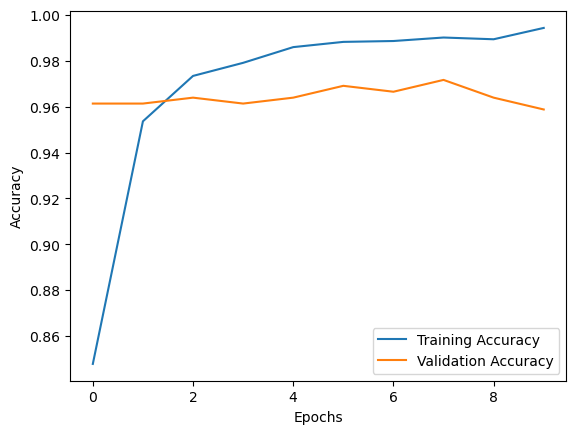

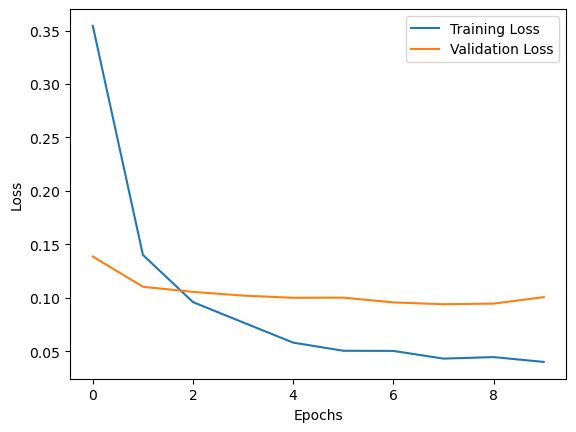

In [69]:


plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [93]:
losses = pd.DataFrame(history.history)
losses.tail(10)

,binary_accuracy,loss,val_binary_accuracy,val_loss,learning_rate
0,0.847909,0.354302,0.961340,0.138649,0.0010
1,0.953612,0.140165,0.961340,0.110390,0.0010
2,0.973384,0.096030,0.963918,0.105620,0.0010
3,0.979087,0.077030,0.961340,0.102152,0.0010
4,0.985932,0.058169,0.963918,0.100095,0.0010
5,0.988213,0.050566,0.969072,0.100212,0.0005
6,0.988593,0.050402,0.966495,0.095785,0.0005
7,0.990114,0.043225,0.971649,0.094063,0.0005
8,0.989354,0.044632,0.963918,0.094663,0.0005
9,0.994297,0.040126,0.958763,0.100714,0.0005


In [73]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - binary_accuracy: 0.9772 - loss: 0.0798


[0.09406299144029617, 0.9716494679450989]

In [ ]:
# Prediction on test Images 

In [76]:
# Make predictions on test images


predictions = model.predict(test_ds)

binary_predictions = np.argmax(predictions, axis=1)

class_labels = list(train_ds.class_indices.keys())

test_filenames = test_ds.filenames

results_df = pd.DataFrame({
    'Filename': test_filenames,
    'True Label': test_ds.classes,
    'Predicted Label': binary_predictions
})

results_df['Predicted Label'] = results_df['Predicted Label'].apply(lambda x: class_labels[x])

print(results_df)


7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step
                        Filename  True Label Predicted Label
0      with_mask\1-with-mask.jpg           0       with_mask
1    with_mask\106-with-mask.jpg           0    without_mask
2     with_mask\11-with-mask.jpg           0    without_mask
3    with_mask\110-with-mask.jpg           0    without_mask
4    with_mask\111-with-mask.jpg           0       with_mask
..                           ...         ...             ...
189          without_mask\74.jpg           1       with_mask
190          without_mask\79.jpg           1    without_mask
191          without_mask\89.jpg           1       with_mask
192          without_mask\93.jpg           1    without_mask
193          without_mask\99.jpg           1    without_mask

[194 rows x 3 columns]


In [88]:
# Test on with mask

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted Label: With Mask
With Mask: 99.99%
Without Mask: 0.00%


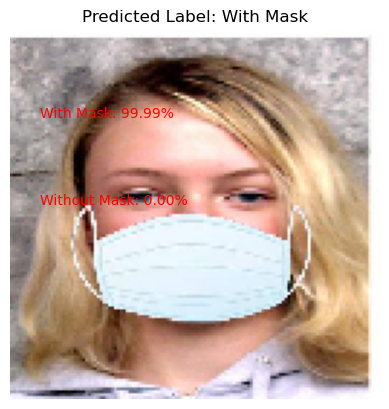

In [84]:


image_shape = (128, 128)

external_image_path = r"C:\Users\HP\Downloads\NN-Graded Internal Assignment (1)\GrayScale28X28MaskDataSet\test\with_mask\51-with-mask.jpg"

external_image = image.load_img(external_image_path, target_size=image_shape)
external_image = image.img_to_array(external_image)
external_image = np.expand_dims(external_image, axis=0)
external_image = external_image / 255.0  

predictions = model.predict(external_image)
predicted_class = np.argmax(predictions)

label_mapping = {0: 'With Mask', 1: 'Without Mask'}
predicted_label = label_mapping[predicted_class]

prediction_percentages = predictions[0] * 100

print("Predicted Label:", predicted_label)
for i in range(len(label_mapping)):
    class_label = label_mapping[i]
    percentage = prediction_percentages[i]
    print(f"{class_label}: {percentage:.2f}%")

plt.imshow(external_image[0])
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')

for i in range(len(label_mapping)):
    class_label = label_mapping[i]
    percentage = prediction_percentages[i]
    plt.text(10, (i + 1) * 30, f"{class_label}: {percentage:.2f}%", color='red')

plt.show()


In [87]:
# Without Mask prediction test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted Label: Without Mask
With Mask: 0.08%
Without Mask: 99.94%


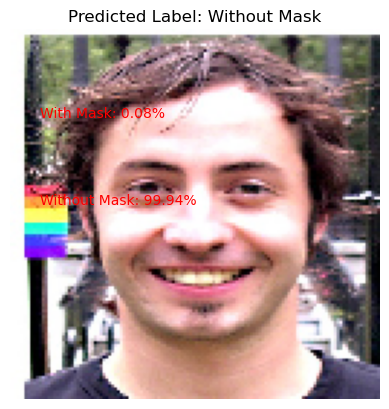

In [86]:
image_shape = (128, 128)

external_image_path = r"C:\Users\HP\Downloads\NN-Graded Internal Assignment (1)\GrayScale28X28MaskDataSet\test\without_mask\218.jpg"

external_image = image.load_img(external_image_path, target_size=image_shape)
external_image = image.img_to_array(external_image)
external_image = np.expand_dims(external_image, axis=0)
external_image = external_image / 255.0  

predictions = model.predict(external_image)
predicted_class = np.argmax(predictions)

label_mapping = {0: 'With Mask', 1: 'Without Mask'}
predicted_label = label_mapping[predicted_class]

prediction_percentages = predictions[0] * 100

print("Predicted Label:", predicted_label)
for i in range(len(label_mapping)):
    class_label = label_mapping[i]
    percentage = prediction_percentages[i]
    print(f"{class_label}: {percentage:.2f}%")

plt.imshow(external_image[0])
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')

for i in range(len(label_mapping)):
    class_label = label_mapping[i]
    percentage = prediction_percentages[i]
    plt.text(10, (i + 1) * 30, f"{class_label}: {percentage:.2f}%", color='red')

plt.show()


In [96]:
# Conclusion


1.Introduction of Mask Detection Algorithm:
    The implementation of a real-time mask detection algorithm using Convolutional Neural Networks (CNNs) is proposed to address challenges faced by the bank's facial recognition system due to the COVID-19 pandemic.


2.Utilization of Established CNN Architectures:
    Inspired by architectures such as VGG16, VGG19, or Xception, the data science team aims to develop a highly accurate and efficient model for mask detection.

3.Enhanced Security and Efficiency:
    The algorithm will enhance the security and efficiency of the bank's entrance authentication process by accurately detecting individuals wearing masks.

4.Addressing False Rejections:
    With increasing rates of false rejections caused by the widespread use of face coverings, the mask detection algorithm provides a solution to mitigate this issue.


5.Focus on Performance Metrics:
    Performance metrics including accuracy, precision, and recall will be rigorously evaluated to ensure the model's effectiveness, with a specific focus on exceeding the 95% threshold.

6.Evaluation of Practical Effectiveness:
The model's performance will be evaluated on its ability to handle variations in lighting conditions, head pose, occlusions, and resolution changes, ensuring practical effectiveness in real-world scenarios.


7.Seamless Integration with Existing Infrastructure:
    The algorithm will seamlessly integrate with the bank's existing infrastructure, enabling smooth operation within the facial recognition system.


8.Commitment to Safety and Security:
    The deployment of the mask detection algorithm demonstrates the bank's commitment to providing a safe and secure environment for its customers and employees amidst the challenges posed by the pandemic.


9.Continuous Evaluation and Refinement:
    Through continuous evaluation and refinement, the algorithm will uphold high standards of performance, contributing to the bank's overall security measures and operational efficiency.


10.Adaptability to New Normal:
    By adapting to the new normal of mask-wearing in public spaces, the mask detection algorithm aligns with evolving safety protocols and ensures the bank's compliance with regulatory requirements.